# Importación de datos



In [1]:
import pandas as pd

url1 = r"base-de-datos-challenge1-latam\tienda_1.csv"
url2 = r"base-de-datos-challenge1-latam\tienda_2.csv"
url3 = r"base-de-datos-challenge1-latam\tienda_3.csv"
url4 = r"base-de-datos-challenge1-latam\tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
ingresoTienda1 = tienda1["Precio"].sum()
ingresoTienda2 = tienda2["Precio"].sum()
ingresoTienda3 = tienda3["Precio"].sum()
ingresoTienda4 = tienda4["Precio"].sum()
ingresoTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso total": [ingresoTienda1, ingresoTienda2, ingresoTienda3, ingresoTienda4]
})
pd.set_option('display.float_format', '{:,.0f}'.format)
ingresoTiendas.head()

,Tienda,Ingreso total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


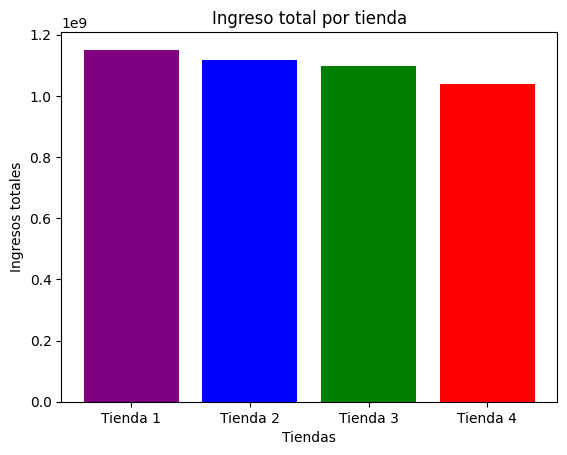

In [3]:
import matplotlib.pyplot as plt

colores = ['purple', 'blue', 'green', 'red'] # Colores parea cada barra
plt.bar(ingresoTiendas["Tienda"],ingresoTiendas["Ingreso total"], color = colores) # Creación de la grafica de barras y sele da un color distinto a cada barra
plt.xlabel('Tiendas')  # Etiquetamos el eje x
plt.ylabel('Ingresos totales')  # Etiquetamos el eje y
plt.title('Ingreso total por tienda')  # Añadimos un título al gráfico
plt.show()

# 2. Ventas por categoría

In [4]:
conteoCategoriaT1 = tienda1['Categoría del Producto'].value_counts()
conteoCategoriaT2 = tienda2['Categoría del Producto'].value_counts()
conteoCategoriaT3 = tienda3['Categoría del Producto'].value_counts()
conteoCategoriaT4 = tienda4['Categoría del Producto'].value_counts()
conteosCategorias = pd.DataFrame({
    'Tienda 1': conteoCategoriaT1,
    'Tienda 2': conteoCategoriaT2,
    'Tienda 3': conteoCategoriaT3,
    'Tienda 4': conteoCategoriaT4
})
conteosCategorias = conteosCategorias.fillna(0)
# Sumar los conteos de todas las tiendas
conteosCategorias['Total'] = conteosCategorias.sum(axis=1)

# Ordenar por 'Total' de mayor a menor
conteosOrdenado = conteosCategorias.sort_values(by='Total', ascending=False)

# Seleccionar las 3 categorías con más cantidad
top = conteosOrdenado.head(3)

top.head()

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
Categoría del Producto,,,,,
Muebles,465,442,499,480,1886
Electrónicos,448,422,451,451,1772
Juguetes,324,313,315,338,1290


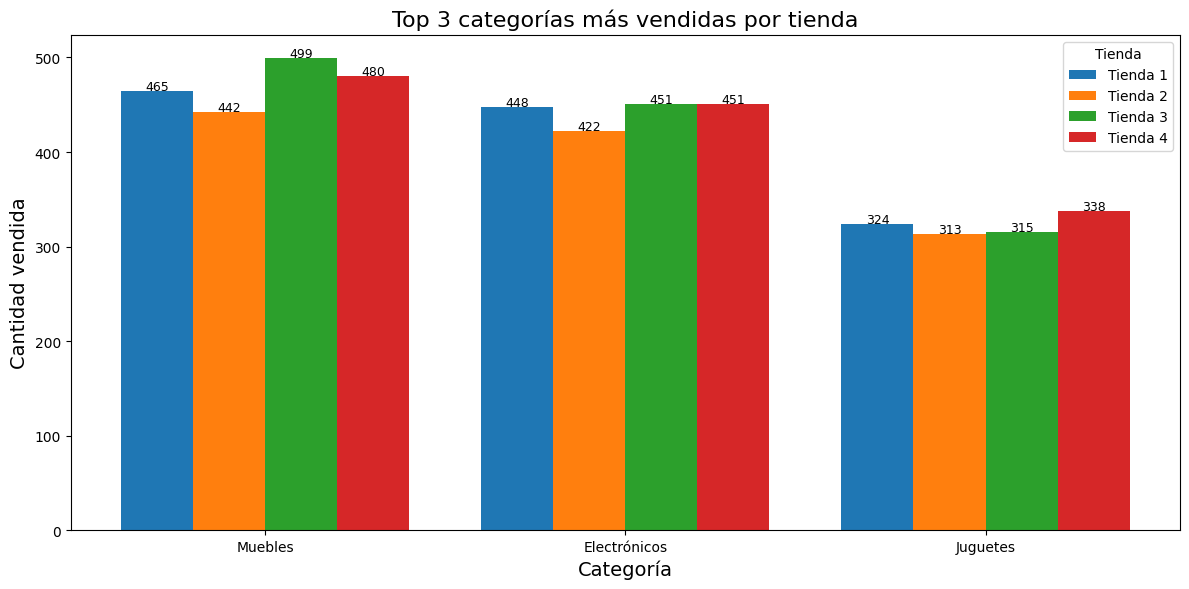

In [6]:
import numpy as np

categorias = top.index.tolist()  # ['Muebles', 'Electrónicos', 'Juguetes']
tienda1Top = top['Tienda 1'].tolist()
tienda2Top = top['Tienda 2'].tolist()
tienda3Top = top['Tienda 3'].tolist()
tienda4Top = top['Tienda 4'].tolist()
# Número de categorías
n_categorias = len(categorias)
indice = np.arange(n_categorias)  # posiciones: 0, 1, 2
ancho = 0.2  # Ancho de cada barra

# Crear la gráfica
plt.figure(figsize=(12,6))

# Dibujar una barra para cada tienda
plt.bar(indice - 1.5*ancho, tienda1Top, width=ancho, label='Tienda 1')
plt.bar(indice - 0.5*ancho, tienda2Top, width=ancho, label='Tienda 2')
plt.bar(indice + 0.5*ancho, tienda3Top, width=ancho, label='Tienda 3')
plt.bar(indice + 1.5*ancho, tienda4Top, width=ancho, label='Tienda 4')

# Configurar etiquetas
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad vendida', fontsize=14)
plt.title('Top 3 categorías más vendidas por tienda', fontsize=16)
plt.xticks(indice, categorias)  # Poner las categorías en el eje X
plt.legend(title='Tienda')

# Mostrar valores arriba de cada barra
for i in range(n_categorias):
    plt.text(indice[i] - 1.5*ancho, tienda1Top[i] + 1, str(int(tienda1Top[i])), ha='center', fontsize=9)
    plt.text(indice[i] - 0.5*ancho, tienda2Top[i] + 1, str(int(tienda2Top[i])), ha='center', fontsize=9)
    plt.text(indice[i] + 0.5*ancho, tienda3Top[i] + 1, str(int(tienda3Top[i])), ha='center', fontsize=9)
    plt.text(indice[i] + 1.5*ancho, tienda4Top[i] + 1, str(int(tienda4Top[i])), ha='center', fontsize=9)

# Ajustar diseño
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [7]:
# Calcula el promedio de calificación por tienda
calificacionTienda1 = tienda1["Calificación"].mean()
calificacionTienda2 = tienda2["Calificación"].mean()
calificacionTienda3 = tienda3["Calificación"].mean()
calificacionTienda4 = tienda4["Calificación"].mean()

# Crear un DataFrame con las calificaciones promedio
calificacionTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificacion Promedio": [calificacionTienda1, calificacionTienda2, calificacionTienda3, calificacionTienda4]
})

# Establecer el formato de visualización para los decimales
pd.set_option('display.float_format', '{:,.2f}'.format)

# Mostrar el DataFrame con las calificaciones promedio
print(calificacionTiendas)

     Tienda  Calificacion Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


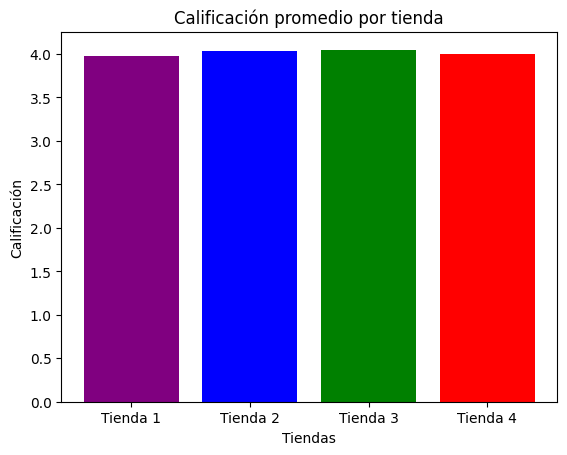

In [8]:
colores = ['purple', 'blue', 'green', 'red'] # Colores parea cada barra
plt.bar(calificacionTiendas["Tienda"],calificacionTiendas["Calificacion Promedio"], color = colores) # Creación de la grafica de barras y sele da un color distinto a cada barra
plt.xlabel('Tiendas')  # Etiquetamos el eje x
plt.ylabel('Calificación')  # Etiquetamos el eje y
plt.title('Calificación promedio por tienda')  # Añadimos un título al gráfico
plt.show()


# 4. Productos más y menos vendidos

In [9]:
# Contar el numero por producto
conteoProductosT1 = tienda1['Producto'].value_counts()
conteoProductosT2 = tienda2['Producto'].value_counts()
conteoProductosT3 = tienda3['Producto'].value_counts()
conteoProductosT4 = tienda4['Producto'].value_counts()
# Lista de conteos y nombres de tiendas
conteos = [conteoProductosT1, conteoProductosT2, conteoProductosT3, conteoProductosT4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Para almacenar los datos
topVentas = []

# Recorrer cada tienda
for tienda, conteo in zip(tiendas, conteos):
    # Top 3 más vendidos
    topMas = conteo.nlargest(3)
    # Top 3 menos vendidos
    topMenos = conteo.nsmallest(3)
    for producto, ventas in topMas.items():
        topVentas.append({'Tienda': tienda, 'Producto': producto, 'Ventas': ventas})
    for producto, ventas in topMenos.items():
        topVentas.append({'Tienda': tienda, 'Producto': producto, 'Ventas': ventas})

# Crear los DataFrames
dfTopVentas = pd.DataFrame(topVentas)
dfTopVentas = dfTopVentas.sort_values(by=['Tienda', 'Ventas'], ascending=[True,False])
dfTopVentas.reset_index(drop=True, inplace=True)

# Mostrar resultados
print("Top 3 productos más vendidos por tienda:")
print(dfTopVentas)


Top 3 productos más vendidos por tienda:
      Tienda                   Producto  Ventas
0   Tienda 1                 Microondas      60
1   Tienda 1              TV LED UHD 4K      60
2   Tienda 1                    Armario      60
3   Tienda 1            Olla de presión      35
4   Tienda 1  Auriculares con micrófono      33
5   Tienda 1               Celular ABXY      33
6   Tienda 2  Iniciando en programación      65
7   Tienda 2                 Microondas      62
8   Tienda 2                    Batería      61
9   Tienda 2            Mesa de comedor      34
10  Tienda 2                  Impresora      34
11  Tienda 2              Juego de mesa      32
12  Tienda 3              Kit de bancas      57
13  Tienda 3            Mesa de comedor      56
14  Tienda 3                  Cama king      56
15  Tienda 3               Set de vasos      36
16  Tienda 3                    Mochila      36
17  Tienda 3    Bloques de construcción      35
18  Tienda 4                   Cama box      62

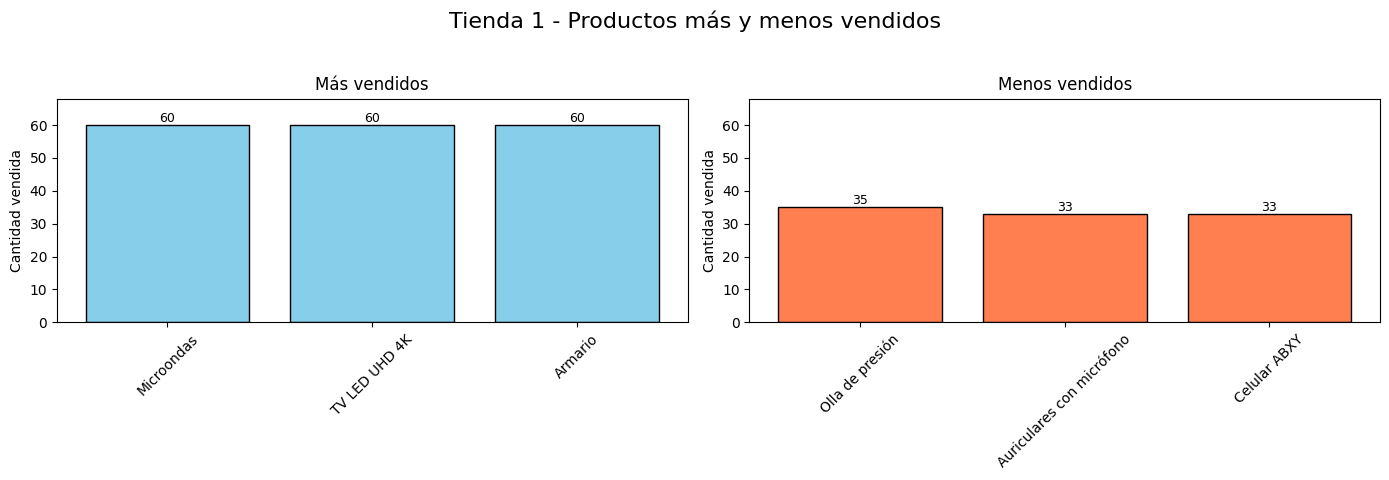

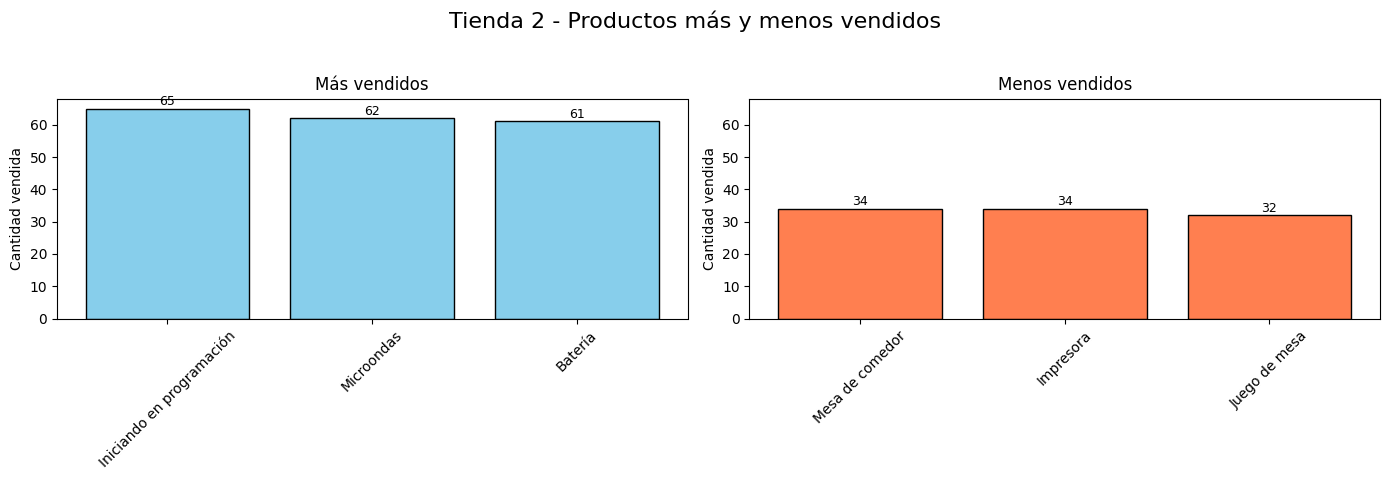

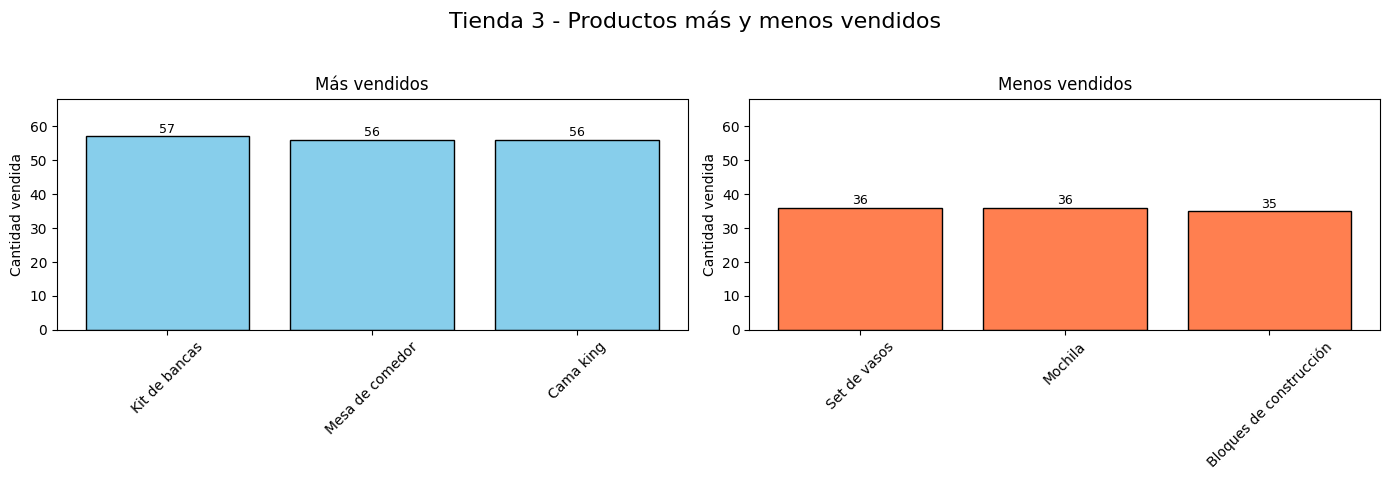

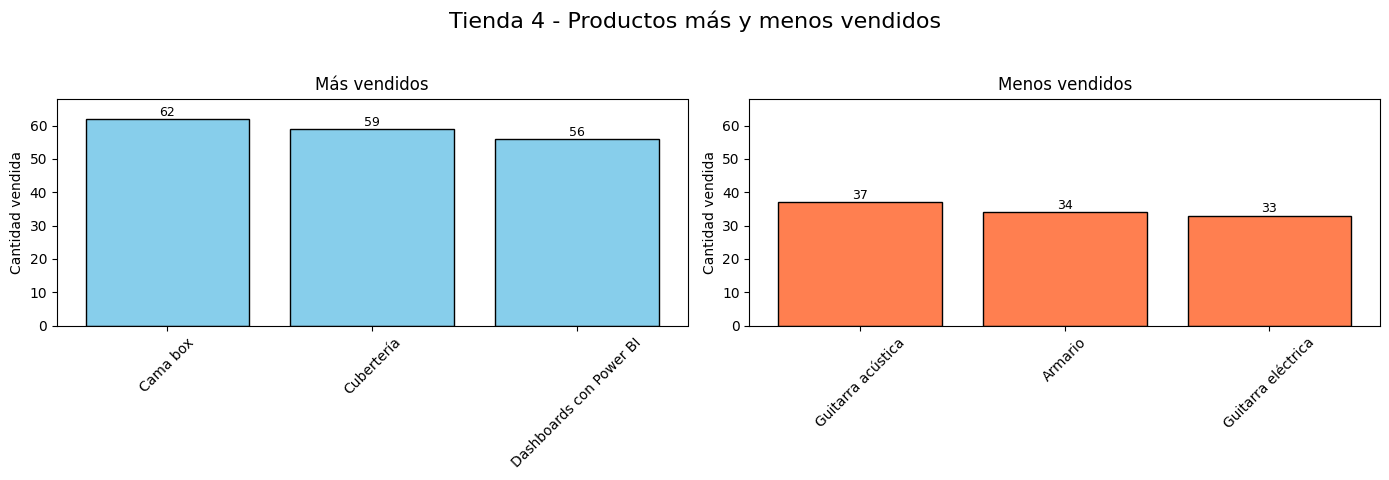

In [10]:
# Agrupar por tienda
tiendas_unicas = dfTopVentas['Tienda'].unique()

for tienda in tiendas_unicas:
    df_tienda = dfTopVentas[dfTopVentas['Tienda'] == tienda].reset_index(drop=True)
    
    # Separar más y menos vendidos (primeros 3 son más vendidos)
    df_mas = df_tienda.iloc[:3]
    df_menos = df_tienda.iloc[3:]

    categorias_mas = df_mas['Producto']
    ventas_mas = df_mas['Ventas']

    categorias_menos = df_menos['Producto']
    ventas_menos = df_menos['Ventas']

    # Crear figura con 2 subgráficas
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'{tienda} - Productos más y menos vendidos', fontsize=16)

    # Definir límites comunes para el eje Y
    limite_y = 68

    # Más vendidos
    axs[0].bar(categorias_mas, ventas_mas, color='skyblue', edgecolor='black')
    axs[0].set_title('Más vendidos')
    axs[0].set_ylabel('Cantidad vendida')
    axs[0].set_ylim(0, limite_y)
    axs[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas sin advertencia
    for i, v in enumerate(ventas_mas):
        axs[0].text(i, v + 1, str(v), ha='center', fontsize=9)

    # Menos vendidos
    axs[1].bar(categorias_menos, ventas_menos, color='Coral', edgecolor='black')
    axs[1].set_title('Menos vendidos')
    axs[1].set_ylabel('Cantidad vendida')
    axs[1].set_ylim(0, limite_y)
    axs[1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(ventas_menos):
        axs[1].text(i, v + 1, str(v), ha='center', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# 5. Envío promedio por tienda

In [12]:
envioTienda1 = tienda1["Costo de envío"].mean()
envioTienda2 = tienda2["Costo de envío"].mean()
envioTienda3 = tienda3["Costo de envío"].mean()
envioTienda4 = tienda4["Costo de envío"].mean()

# Crear un DataFrame con las calificaciones promedio
envioTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de envio promedio": [envioTienda1, envioTienda2, envioTienda3, envioTienda4]
})

# Mostrar el DataFrame con las calificaciones promedio
print(envioTiendas)

     Tienda  Costo de envio promedio
0  Tienda 1                26,018.61
1  Tienda 2                25,216.24
2  Tienda 3                24,805.68
3  Tienda 4                23,459.46


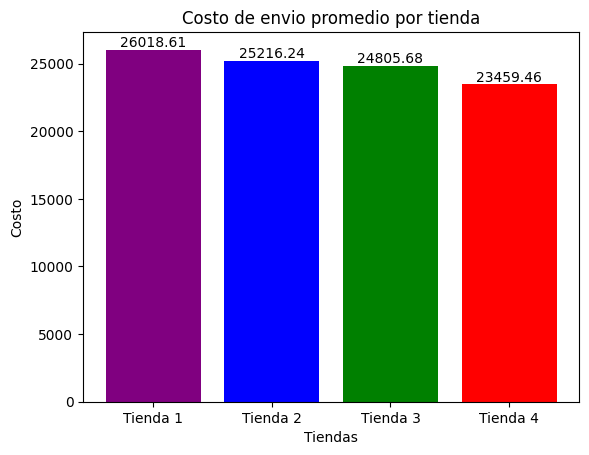

In [13]:
colores = ['purple', 'blue', 'green', 'red'] # Colores parea cada barra
plt.bar(envioTiendas["Tienda"],envioTiendas["Costo de envio promedio"], color = colores) # Creación de la grafica de barras y sele da un color distinto a cada barra
plt.xlabel('Tiendas')  # Etiquetamos el eje x
plt.ylabel('Costo')  # Etiquetamos el eje y
plt.title('Costo de envio promedio por tienda')  # Añadimos un título al gráfico
for i, valor in enumerate(envioTiendas["Costo de envio promedio"]):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom')
plt.show()